In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt

In [2]:
trainset = pd.read_csv("archive/train.csv")
testset = pd.read_csv("archive/test_public.csv")

In [3]:
print(trainset.shape, testset.shape)

(1710670, 9) (320, 8)


In [4]:
def polyline_to_trip_duration(polyline):
  return max(polyline.count("[") - 2, 0) * 15

trainset["LEN"] = trainset["POLYLINE"].apply(polyline_to_trip_duration)

In [5]:
print(trainset['LEN'].quantile([0, 0.25, 0.5, 0.75, 1]))
print(trainset['LEN'].mean())
print(trainset['LEN'].std())

0.00        0.0
0.25      405.0
0.50      600.0
0.75      870.0
1.00    58200.0
Name: LEN, dtype: float64
716.4264615618442
684.7511617508213


Text(0.5, 1.0, 'Trip length distribution')

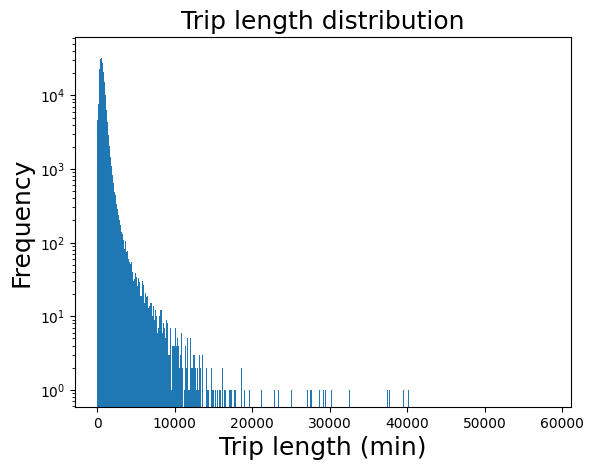

In [6]:
plt.hist(trainset["LEN"], bins=range(0, trainset["LEN"].max()+15, 15), log=True)
plt.xlabel("Trip length (min)", fontsize=18)
plt.ylabel("Frequency", fontsize=18)
plt.title("Trip length distribution", fontsize=18)

In [7]:
longitude, latitude = [], []
for polyline in trainset["POLYLINE"]:
    polyline = polyline.replace("[", "").replace("]", "").split(",")
    polyline = [float(x) for x in polyline if x != ""]
    longitude += polyline[::2]
    latitude += polyline[1::2]


Text(0.5, 1.0, 'Trip position distribution')

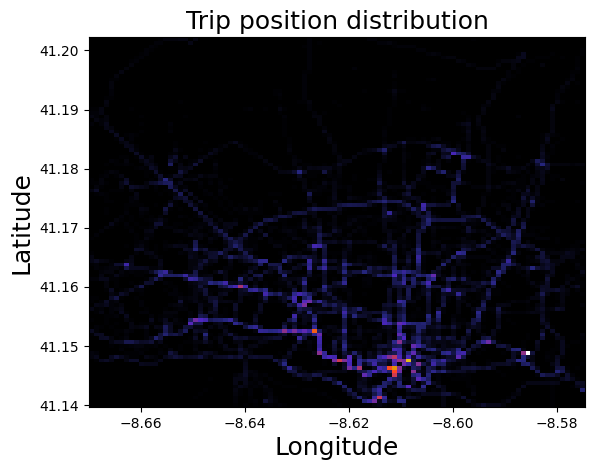

In [9]:
plt.hist2d(longitude, latitude, cmap="CMRmap", bins=[100, 100], range=[np.quantile(longitude, [0.05, 0.95]), np.quantile(latitude, [0.05, 0.95])])
plt.xlabel("Longitude", fontsize=18)
plt.ylabel("Latitude", fontsize=18)
plt.title("Trip position distribution", fontsize=18)